# X-ray Gas Mass-Temperature Relation

In this notebook we make a simple comparison of X-ray gas masses and temperatures to a measurements from literature. The gas masses and temperatures have been measured during the course of this work. Our data are such that it is not particularly helpful to fit our own scaling relation, but we can overplot them on top of a scaling relation fit from a literature dataset of gas mass and temperature measurements.

## Import Statements

In [1]:
import numpy as np
from astropy.units import Quantity
import pandas as pd

from xga.products.relation import ScalingRelation
from xga.models.misc import power_law
from xga.utils import DEFAULT_COSMO

%matplotlib inline

## Loading data tables

We load our measurements of X-ray properties; we need both the XGA-LTR results tables and the gas mass measurement table:

In [2]:
xray_prop = pd.read_csv("../../outputs/results/ltr_r500_pipeline_results.csv")

xray_prop

,name,ra,dec,redshift,r500,r500+-,Tx500,Tx500-,Tx500+,Lx500_0.5-2.0,...,Lx500_0.01-100.0+,Tx500ce,Tx500ce-,Tx500ce+,Lx500ce_0.5-2.0,Lx500ce_0.5-2.0-,Lx500ce_0.5-2.0+,Lx500ce_0.01-100.0,Lx500ce_0.01-100.0-,Lx500ce_0.01-100.0+
0,25124A,243.629055,26.730240,0.186,867.647767,39.128436,3.817000,0.287230,0.326195,7.396831e+43,...,7.694207e+42,4.240060,0.463875,0.698658,4.661778e+43,1.474055e+42,1.136021e+42,1.407295e+44,1.243112e+43,8.999482e+42
1,25124B,243.504000,26.691000,0.186,665.433860,93.790303,2.121080,0.453657,1.097385,4.858143e+42,...,1.947342e+42,1.668870,0.571085,1.111938,3.756145e+42,5.779736e+41,7.552022e+41,7.921396e+42,1.571571e+42,1.660467e+42
2,25124C,243.541000,26.648000,0.186,504.349762,26.563232,1.505450,0.118645,0.157002,4.980125e+42,...,1.368388e+42,1.475180,0.123717,0.146730,4.692879e+42,3.996000e+41,5.333483e+41,9.510069e+42,9.116242e+41,1.309781e+42
3,44739,229.793620,28.331750,0.118,426.978169,22.844914,1.024810,0.066587,0.081072,2.328422e+42,...,5.811503e+41,0.993314,0.088181,0.086573,1.873450e+42,2.306554e+41,2.767644e+41,3.233224e+42,3.960150e+41,4.341351e+41
4,19670AB,150.226402,50.800565,0.134,527.139938,30.952352,1.978950,0.341111,0.660766,3.495482e+42,...,1.398974e+42,1.561920,0.179030,0.293561,2.992024e+42,3.335254e+41,3.754196e+41,6.209580e+42,1.028791e+42,1.035156e+42
5,19670A,150.256710,50.793942,0.134,462.177328,27.670531,1.252010,0.113311,0.139826,1.581114e+42,...,7.445787e+41,1.333620,0.148756,0.199910,1.176707e+42,3.641293e+41,3.858331e+41,2.310265e+42,7.379632e+41,6.230597e+41
6,19670B,150.214920,50.805014,0.134,591.610814,44.926843,1.907300,0.243713,0.425694,4.533795e+42,...,1.244323e+42,1.652700,0.244968,0.313360,3.512372e+42,3.266195e+41,5.632695e+41,7.421187e+42,8.747499e+41,8.987884e+41
7,19670C,150.065000,50.746000,0.134,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,19670D,150.168000,50.686000,0.134,359.762893,58.758058,0.326002,0.070427,0.247115,7.776962e+41,...,3.734298e+41,0.246174,0.060497,0.107147,6.906259e+41,4.756693e+41,1.577939e+41,1.729986e+42,1.048810e+42,5.710794e+41
9,12833A,129.496800,44.248700,0.145,484.161429,22.267250,1.394590,0.098024,0.113226,3.419655e+42,...,7.096560e+41,1.416080,0.145301,0.239000,2.240773e+42,3.645432e+41,2.770394e+41,4.498901e+42,7.032202e+41,5.884023e+41


In [3]:
gas_masses = pd.read_csv("../../outputs/results/all_hot_gm_measurements.csv")
gas_masses

,name,gm500,gm500-,gm500+,gm2500,gm2500-,gm2500+,gm_froztemp500,gm_froztemp500-,gm_froztemp500+,gm_froztemp2500,gm_froztemp2500-,gm_froztemp2500+
0,25124A,2.7412,0.1464,0.1433,0.8997,0.0461,0.0455,2.7586,0.0591,0.0582,1.0464,0.0221,0.0221
1,25124B,0.0835,0.0086,0.0086,0.0624,0.0058,0.0061,0.0813,0.0076,0.0077,0.0561,0.0043,0.0046
2,25124C,0.2427,0.0250,0.0259,0.0645,0.0107,0.0115,0.3012,0.0229,0.0244,0.0511,0.0053,0.0056
3,44739,0.0080,0.0013,0.0015,0.0077,0.0011,0.0011,0.0080,0.0013,0.0016,0.0079,0.0012,0.0013
4,19670AB,0.1037,0.0064,0.0068,0.0603,0.0051,0.0050,0.1042,0.0063,0.0066,0.0580,0.0036,0.0036
5,19670A,0.0191,0.0022,0.0026,0.0178,0.0017,0.0018,0.0191,0.0022,0.0026,0.0179,0.0016,0.0017
6,19670B,0.0438,0.0031,0.0031,0.0400,0.0021,0.0022,0.0438,0.0030,0.0030,0.0388,0.0019,0.0019
7,19670D,0.0915,0.0128,0.0135,0.0801,0.0105,0.0106,0.1058,0.0135,0.0169,0.0669,0.0050,0.0053
8,12833A,0.1661,0.0117,0.0120,0.0588,0.0034,0.0034,0.1989,0.0130,0.0136,0.0761,0.0041,0.0041
9,12833B,0.1772,0.0181,0.0200,NaN,NaN,NaN,0.2204,0.0214,0.0225,NaN,NaN,NaN


We then combine the two tables:

In [4]:
comb = pd.merge(xray_prop, gas_masses, on='name')
comb

,name,ra,dec,redshift,r500,r500+-,Tx500,Tx500-,Tx500+,Lx500_0.5-2.0,...,gm500+,gm2500,gm2500-,gm2500+,gm_froztemp500,gm_froztemp500-,gm_froztemp500+,gm_froztemp2500,gm_froztemp2500-,gm_froztemp2500+
0,25124A,243.629055,26.730240,0.186,867.647767,39.128436,3.817000,0.287230,0.326195,7.396831e+43,...,0.1433,0.8997,0.0461,0.0455,2.7586,0.0591,0.0582,1.0464,0.0221,0.0221
1,25124B,243.504000,26.691000,0.186,665.433860,93.790303,2.121080,0.453657,1.097385,4.858143e+42,...,0.0086,0.0624,0.0058,0.0061,0.0813,0.0076,0.0077,0.0561,0.0043,0.0046
2,25124C,243.541000,26.648000,0.186,504.349762,26.563232,1.505450,0.118645,0.157002,4.980125e+42,...,0.0259,0.0645,0.0107,0.0115,0.3012,0.0229,0.0244,0.0511,0.0053,0.0056
3,44739,229.793620,28.331750,0.118,426.978169,22.844914,1.024810,0.066587,0.081072,2.328422e+42,...,0.0015,0.0077,0.0011,0.0011,0.0080,0.0013,0.0016,0.0079,0.0012,0.0013
4,19670AB,150.226402,50.800565,0.134,527.139938,30.952352,1.978950,0.341111,0.660766,3.495482e+42,...,0.0068,0.0603,0.0051,0.0050,0.1042,0.0063,0.0066,0.0580,0.0036,0.0036
5,19670A,150.256710,50.793942,0.134,462.177328,27.670531,1.252010,0.113311,0.139826,1.581114e+42,...,0.0026,0.0178,0.0017,0.0018,0.0191,0.0022,0.0026,0.0179,0.0016,0.0017
6,19670B,150.214920,50.805014,0.134,591.610814,44.926843,1.907300,0.243713,0.425694,4.533795e+42,...,0.0031,0.0400,0.0021,0.0022,0.0438,0.0030,0.0030,0.0388,0.0019,0.0019
7,19670D,150.168000,50.686000,0.134,359.762893,58.758058,0.326002,0.070427,0.247115,7.776962e+41,...,0.0135,0.0801,0.0105,0.0106,0.1058,0.0135,0.0169,0.0669,0.0050,0.0053
8,12833A,129.496800,44.248700,0.145,484.161429,22.267250,1.394590,0.098024,0.113226,3.419655e+42,...,0.0120,0.0588,0.0034,0.0034,0.1989,0.0130,0.0136,0.0761,0.0041,0.0041
9,12833B,129.445000,44.379000,0.145,435.477156,26.364544,1.161630,0.135227,0.116765,2.511945e+42,...,0.0200,NaN,NaN,NaN,0.2204,0.0214,0.0225,NaN,NaN,NaN


## Comparing to scaling relations

Here we compare our measurements to existing scaling relations between X-ray luminosity and temperature. The selected scaling relations were not necessarily measured specifically for galaxy groups.

### Reading out data points

We need to get the data points ready for over-plotting on the scaling relations. This involves reading them out of the data table and putting them in astropy quantities. We make sure to multiply the luminosity with the inverse E(z) factor calculated from the cluster redshifts.

In [5]:
e_val = DEFAULT_COSMO.efunc(comb['redshift'].values)
mgas = Quantity(comb[['gm500', 'gm500-', 'gm500+']].values*1e+13, 'Msun')*e_val[..., None]
tx = Quantity(comb[['Tx500', 'Tx500-', 'Tx500+']].values, 'keV')

### Scaling relation fit from Lovisari et al. measurements

This relation was measured fit for our work, but from results presented by by [Lovisari et al. 2020](https://ui.adsabs.harvard.edu/abs/2020ApJ...892..102L/abstract), as they do not provide results from a fit to this particular relation. We trick the relation somewhat by adding data points, for the sake of convenience. This relation was not measured specifically from a galaxy group sample, and as such may not make for a perfect comparison:

In [6]:
mgas_tx = ScalingRelation(np.array([1.97088387, 0.97293563]), np.array([0.08826349, 0.02123864]), power_law, 
                          Quantity(6.265000000000001, 'keV'), Quantity(8.7880192e+13, 'Msun'), 
                          r"T$_{\rm{X},500}$", r"$E(z)M^{\rm{gas}}_{500}$", x_lims=Quantity([0.3, 12], 'keV'), 
                          dim_hubb_ind=1)

In [7]:
mgas_tx._y_data = mgas[:, 0]
mgas_tx._y_err = mgas[:, 1]

mgas_tx._x_data = tx[:, 0]
mgas_tx._x_err = tx[:, 1]

mgas_tx._point_names = comb['name'].values

# mgas_tx._x_name = r"$T_{\rm{X,500}}$"
# mgas_tx._y_name = r"$E(z)^{-1}L^{0.5-2.0}_{\rm{X,500}}$"
mgas_tx.model_colour = 'darkcyan'

## Plotting our data

Here we make use of the scaling relation objects that we just defined to illustrate how our data compare to the literature relations.

#### Labelling our data points for context

First of all, we plot the scaling relation with data points labelled - so it is easy to link particular points to particular groups/clusters:

In [8]:
for name_ind, name in enumerate(mgas_tx.point_names):
    print(name_ind, '-', name)

0 - 25124A
1 - 25124B
2 - 25124C
3 - 44739
4 - 19670AB
5 - 19670A
6 - 19670B
7 - 19670D
8 - 12833A
9 - 12833B
10 - 44858
11 - J215504.8-093520
12 - J215437.2-091532.4
13 - 50433


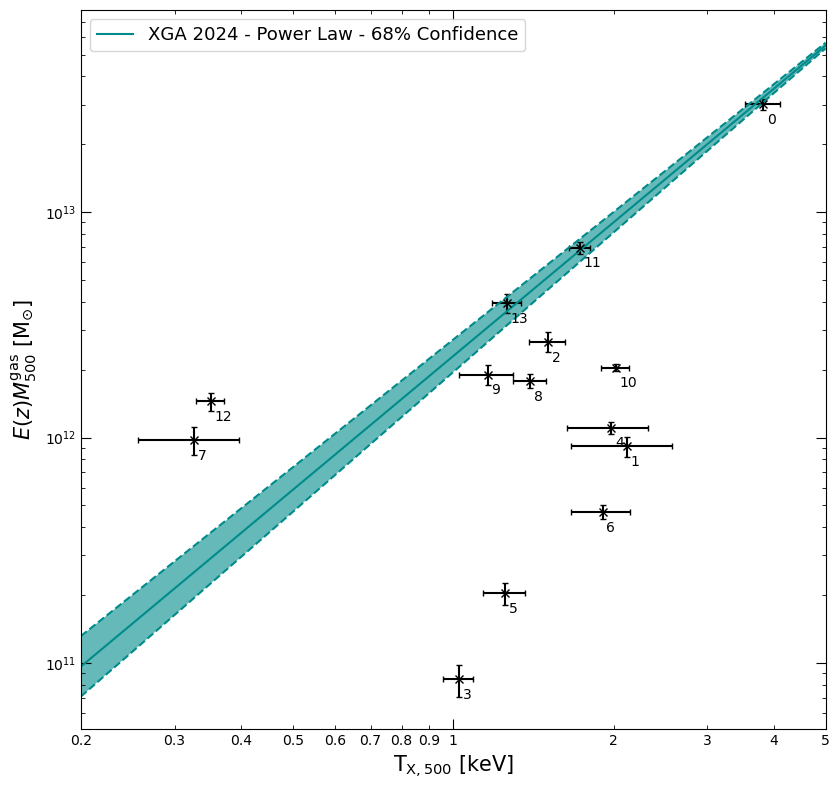

In [9]:
mgas_tx.view(x_lims=Quantity([0.2, 5], 'keV'), log_scale=True, label_points=True, conf_level=68, 
             plot_title='', figsize=(8.5, 8), point_label_offset=(0.005, -0.03), 
             save_path="../../outputs/figures/mgas_tx_relation_comp_pntlab.pdf")

#### Comparing data to the relation without labels

This not only plots the scaling relation, but also overlays our data points. The plot is displayed in the notebook and also saved to disk:

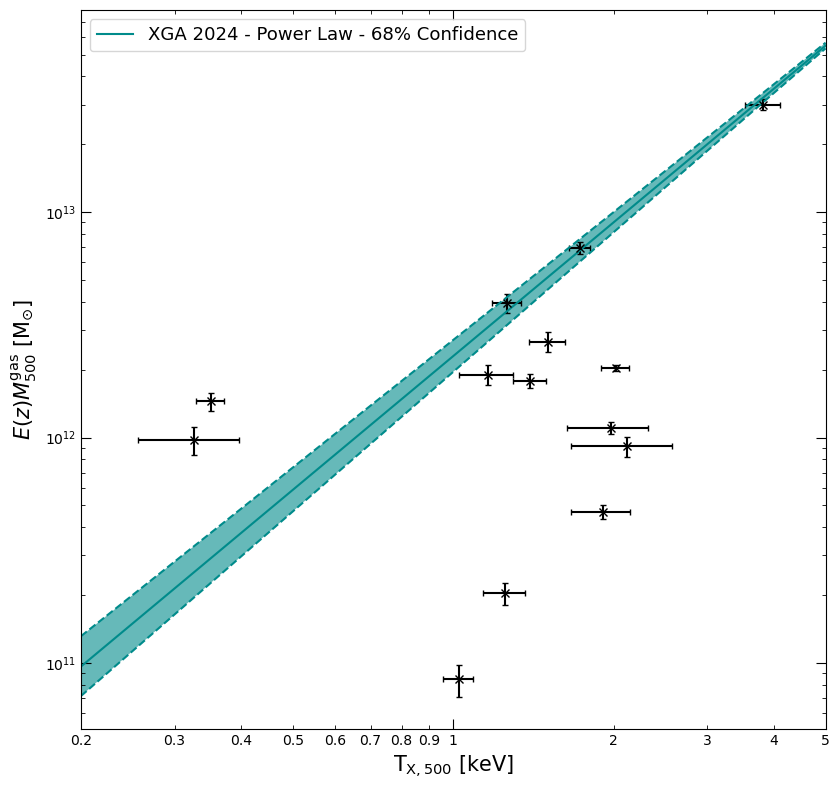

In [10]:
mgas_tx.view(x_lims=Quantity([0.2, 5], 'keV'), log_scale=True, label_points=False, conf_level=68, 
             plot_title='', figsize=(8.5, 8), point_label_offset=(0.005, -0.03), 
             save_path="../../outputs/figures/mgas_tx_relation_comp.pdf")

In [11]:
# from matplotlib import pyplot as plt

In [12]:
# xray_prop2500 = pd.read_csv("../../outputs/results/ltr_r2500_pipeline_results.csv")
# comb2500 = pd.merge(xray_prop2500, gas_masses, on='name')


In [13]:
# e_val = DEFAULT_COSMO.efunc(comb2500['redshift'].values)
# mgas2500 = Quantity(comb2500[['gm2500', 'gm2500-', 'gm2500+']].values*1e+13, 'Msun')*e_val[..., None]

# tx2500 = Quantity(comb2500[['Tx2500', 'Tx2500-', 'Tx2500+']].values, 'keV')

# plt.figure(figsize=(6, 6))
# plt.errorbar(tx2500[:, 0].value, mgas2500[:, 0].value, xerr=tx2500[:, 1:].value.T, 
#              yerr=mgas2500[:, 1:].value.T, fmt='kx', capsize=2)

# plt.xscale('log')
# plt.yscale('log')

# plt.show()

In [14]:
# mgas_tx2500 = ScalingRelation(np.array([2.09548899, 0.6202576]), np.array([0.09096547, 0.02543994]), power_law, 
#                           Quantity(3.75881, 'keV'), Quantity(1.2881955e+12, 'Msun'), 
#                           r"T$_{\rm{X},2500}$", r"$E(z)M^{\rm{gas}}_{2500}$", x_lims=Quantity([0.3, 12], 'keV'), 
#                           dim_hubb_ind=1)

In [15]:
# mgas_tx2500._y_data = mgas2500[:, 0]
# mgas_tx2500._y_err = mgas2500[:, 1]

# mgas_tx2500._x_data = tx2500[:, 0]
# mgas_tx2500._x_err = tx2500[:, 1]

# mgas_tx2500._point_names = comb2500['name'].values

# # mgas_tx._x_name = r"$T_{\rm{X,500}}$"
# # mgas_tx._y_name = r"$E(z)^{-1}L^{0.5-2.0}_{\rm{X,500}}$"
# mgas_tx2500.model_colour = 'darkcyan'

In [16]:
# mgas2500[:, 0 ]

In [17]:
# mgas_tx2500.view(x_lims=Quantity([0.2, 12], 'keV'), log_scale=True, label_points=True, conf_level=68, 
#              plot_title='', figsize=(8.5, 8), point_label_offset=(0.005, -0.03))